In [1]:
import pandas as pd
from matplotlib import pyplot as plt
#!pip install matplotlib
import seaborn as sns
#!pip install seaborn

# Intro

La visualización de datos es el proceso de proveer una representacion visual de datos. En esta clase revisaremos algunas de las bibliotecas mas comunes para este proposito dentro del ecosistema de python y al final de la misma tendremos herramientas para comunicar datos de una manera efectiva.

## Bibliotecas
- Módulo de plotting de pandas
- Pyplot
- Seaborn
- Pandas profiling

## [Datos](https://datos.gob.ar/dataset/produccion-salarios-por-departamentopartido-sector-actividad/archivo/produccion_bf44ecde-5bad-4e46-8eb3-5d90231e0088)



Datos correspondientes al salario bruto promedio y mediano de los asalariados registrados, por sector de actividad (letra) y departamento/partido (de acuerdo al domicilio donde vive la persona trabajadora). Las series se presentan para tres universos: sector privado, "total empresas" (sector privado junto con empresas públicas) y total. Los datos tienen una frecuencia mensual y van desde 2018 hasta la actualidad. Nota: los datos correspondientes a CABA se presentan sin desagregar.

In [2]:
salarios = pd.read_csv('../data/w_mean_depto_priv_letra.csv')
dptos = pd.read_csv('../data/diccionario_cod_depto.csv')
rubros = pd.read_csv('../data/diccionario_clae2.csv')

In [12]:
salarios.head()

,fecha,codigo_departamento_indec,id_provincia_indec,letra,w_mean
0,2018-01-01,2000.0,2.0,A,38351.355546
1,2018-01-01,2000.0,2.0,B,133687.956861
2,2018-01-01,2000.0,2.0,C,45549.126673
3,2018-01-01,2000.0,2.0,D,85563.761859
4,2018-01-01,2000.0,2.0,E,50398.953667


In [6]:
rubros.head()

,clae2,clae2_desc,letra,letra_desc
0,1,"Agricultura, ganadería, caza y servicios relac...",A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y ..."
1,2,Silvicultura y explotación forestal,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y ..."
2,3,Pesca y acuicultura,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y ..."
3,5,Extracción de carbón y lignito,B,EXPLOTACION DE MINAS Y CANTERAS
4,6,Extracción de petróleo crudo y gas natural,B,EXPLOTACION DE MINAS Y CANTERAS


In [7]:
dptos.head()

,codigo_departamento_indec,nombre_departamento_indec,id_provincia_indec,nombre_provincia_indec
0,2000,CABA,2,CABA
1,6007,Adolfo Alsina,6,Buenos Aires
2,6014,Adolfo Gonzales Chaves,6,Buenos Aires
3,6021,Alberti,6,Buenos Aires
4,6028,Almirante Brown,6,Buenos Aires


#### Algunas transformaciones previas

In [8]:
letra = rubros['letra'].unique()

In [9]:
salarios['letra'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'P', 'Q', 'R', 'S', 'Z'], dtype=object)

In [14]:
'A' in letra

True

In [15]:
salarios['id_provincia_indec'] = pd.to_numeric(salarios['id_provincia_indec'])
salarios['codigo_departamento_indec'] = pd.to_numeric(salarios['codigo_departamento_indec'])
dptos['id_provincia_indec'] = pd.to_numeric(dptos['id_provincia_indec'])

In [16]:
salarios['rubro'] = salarios.apply(lambda x: rubros[rubros['letra']==x['letra']]['letra_desc'].unique()[0] if x['letra'] in letra else 'Desconocido', axis=1)

In [36]:
salarios['provincia'] = salarios.apply(lambda x: dptos[dptos['id_provincia_indec']==x['id_provincia_indec']]['nombre_provincia_indec'].unique()[0] if x['id_provincia_indec'] >= 0 else 'Desconocido', axis=1)

In [37]:
salarios['dpto'] = salarios.apply(lambda x: dptos[dptos['codigo_departamento_indec']==x['codigo_departamento_indec']]['nombre_departamento_indec'].unique()[0] if x['codigo_departamento_indec'] >= 0 else 'Desconocido', axis=1)

In [38]:
salarios.head()

,fecha,codigo_departamento_indec,id_provincia_indec,letra,w_mean,rubro,provincia,dpto
0,2018-01-01,2000.0,2.0,A,38351.355546,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y ...",CABA,CABA
1,2018-01-01,2000.0,2.0,B,133687.956861,EXPLOTACION DE MINAS Y CANTERAS,CABA,CABA
2,2018-01-01,2000.0,2.0,C,45549.126673,INDUSTRIA MANUFACTURERA,CABA,CABA
3,2018-01-01,2000.0,2.0,D,85563.761859,"SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE...",CABA,CABA
4,2018-01-01,2000.0,2.0,E,50398.953667,SUMINISTRO DE AGUA; CLOACAS; GESTIÓN DE RESID...,CABA,CABA


Guardo para no tener que volver a hacerlo en el futuro

In [39]:
salarios.to_csv('salarios_curated.csv')

In [17]:
salarios = pd.read_csv('salarios_curated.csv')

### Personal CyT

In [18]:
personal_cyt = pd.read_csv('personas_2019.csv',sep=';')

In [19]:
ref_grado = pd.read_csv('ref_grado_academico.csv',sep=';')
ref_grado.head()

,grado_academico_id,descripcion
0,-1,Sin datos
1,1,Universitario de posgrado/doctorado
2,2,Universitario de posgrado/maestría
3,3,Universitario de posgrado/especialización
4,4,Universitario de posgrado/perfeccionamiento


In [20]:
grados = ref_grado['grado_academico_id'].unique()

In [21]:
personal_cyt['grado'] = personal_cyt.apply(lambda x: ref_grado[ref_grado['grado_academico_id']==x['maximo_grado_academico_id']]['descripcion'].unique()[0] if x['maximo_grado_academico_id'] in grados else 'Desconocido', axis=1)

In [22]:
personal_cyt['sexo'] = personal_cyt['sexo_id'].apply(lambda x: 'Femenino' if x==1.0 else 'Masculino')

In [11]:
personal_cyt.head()

,persona_id,anio,sexo_id,edad,maximo_grado_academico_id,disciplina_maximo_grado_academico_id,disciplina_titulo_grado_id,disciplina_experticia_id,tipo_personal_id,producciones_ult_anio,...,institucion_trabajo_id,seniority_level,categoria_conicet_id,categoria_incentivos,max_dedicacion_horaria_docente_id,institucion_cargo_docente_id,clase_cargo_docente_id,tipo_condicion_docente_id,grado,sexo
0,1,2019,2,44,-1,-1,-1,64,1,0,...,4488,D,11.0,-1.0,3.0,116.0,22.0,1.0,Sin datos,Masculino
1,5,2019,1,56,1,255,255,255,3,0,...,118,B,3.0,3.0,3.0,118.0,19.0,1.0,Universitario de posgrado/doctorado,Femenino
2,7,2019,2,38,1,158,111,158,3,0,...,16229,C,1.0,-1.0,3.0,192.0,21.0,2.0,Universitario de posgrado/doctorado,Masculino
3,10,2019,2,59,5,248,248,29,3,7,...,44,C,-1.0,4.0,3.0,124.0,21.0,1.0,Universitario de grado,Masculino
4,12,2019,2,56,1,58,57,55,4,0,...,578,,-1.0,3.0,1.0,578.0,17.0,2.0,Universitario de posgrado/doctorado,Masculino


# Pandas plotting



Pandas incorpora algunas facilidades para [visualizaciones](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) que son _wrappers_ alrededor de matplotlib.

Veremos algunos plots sencillos aquí.

## Pie chart

Tenemos una variable que es sexo y queremos ver cual es la distribución del mismo en el sector de CyT. Para esto, hagamos un [pie chart](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#pie-plot).

<AxesSubplot:ylabel='count'>

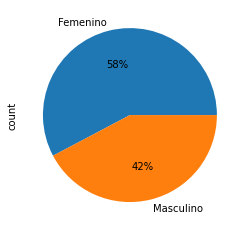

In [23]:
personal_cyt['sexo'].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)

## Barplot

Ahora, consideremos la distribución de grado:

In [12]:
personal_cyt["grado"].value_counts().sort_values(
    ascending=False
)

Universitario de posgrado/doctorado          27325
Universitario de grado                       25594
Universitario de posgrado/maestría           10839
Universitario de posgrado/especialización     9609
Medio                                         1277
Sin datos                                      834
Terciario no universitario                     485
Básico                                          28
Name: grado, dtype: int64

Con un pie plot, quedaría demasiado... complicado de interpretar:

<AxesSubplot:ylabel='grado'>

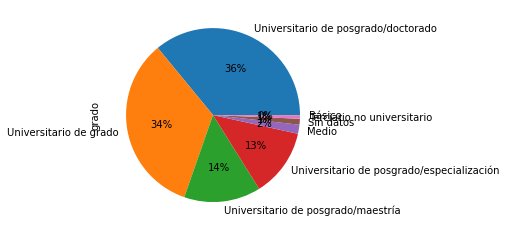

In [13]:
personal_cyt["grado"].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)

Básico es poco común, queda totalmente perdida. Por otro lado, sin las anotaciones de los porcentajes, sería muy dificil saber la diferencia entre `Universitario de maestria` y `Universitario de especialización`.

Por esto, es mejor un [bar plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#bar-plots):

<AxesSubplot:xlabel='grado'>

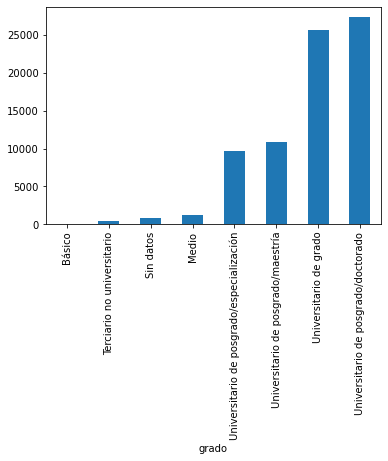

In [26]:
personal_cyt["grado"].value_counts().sort_values(
    ascending=True
).plot(kind='bar')

## Scatter plot

Ahora tenemos la duda, ¿Cómo se relaciona la producción en CyT con la edad? Tenemos puntos en dos dimensiones y queremos entender como se relacionan. Para ello, un [scatter plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot) es adecuado:

<AxesSubplot:xlabel='edad', ylabel='producciones_ult_3_anios'>

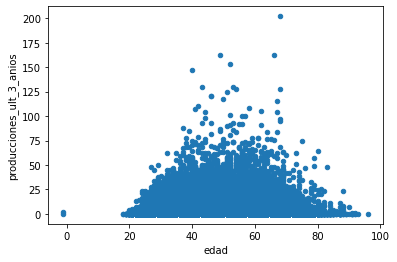

In [15]:
personal_cyt.plot(
    x='edad',
    y='producciones_ult_3_anios',
    kind='scatter',
)

Tenemos un montón de puntos apelotonados en el centro, veamos de reducir el diámetro de cada punto:

<AxesSubplot:xlabel='edad', ylabel='producciones_ult_3_anios'>

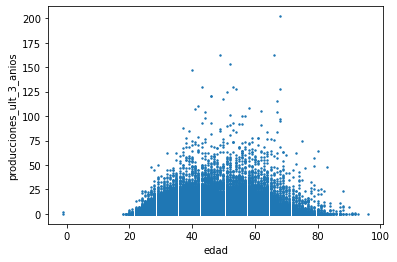

In [19]:
personal_cyt.plot(
    x='edad',
    y='producciones_ult_3_anios',
    kind='scatter',
    s=2
)

¿Muy chico?

<AxesSubplot:xlabel='edad', ylabel='producciones_ult_3_anios'>

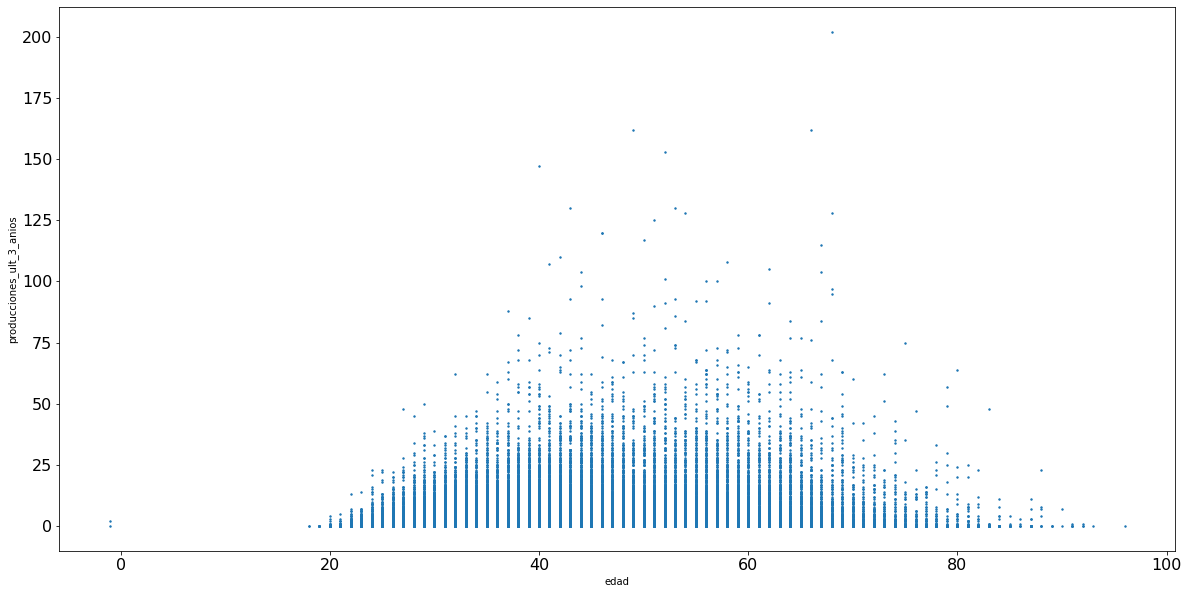

In [23]:
personal_cyt.plot(
    x='edad',
    y='producciones_ult_3_anios',
    kind='scatter',
    s=2,
    figsize=(20, 10)
    , fontsize=16
)

## Histograma

Ahora, pasemos a los salarios, por simplicidad primero tomaremos los de marzo 2022 en Buenos Aires y nos preguntaremos ¿hay muchos valores únicos?

In [29]:
salarios_2022 = salarios[salarios['fecha']=='2022-03-01']
salarios_2022_bsas = salarios_2022[salarios_2022['provincia'] == 'Buenos Aires']
salarios_2022_bsas['w_mean'].nunique()

2424

Sí, montones. Podemos hacer un bar plot?

In [27]:
# df['¿De qué % fue el ajuste total?'].plot(kind='bar')

NameError: name 'df' is not defined

Podemos _intentarlo_ pero tarda una barbaridad en renderizarse.

Entonces, tenemos un soporte continuo, demasiados valores únicos. Seamos inteligentes y hagamos un [histograma](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

<AxesSubplot:ylabel='Frequency'>

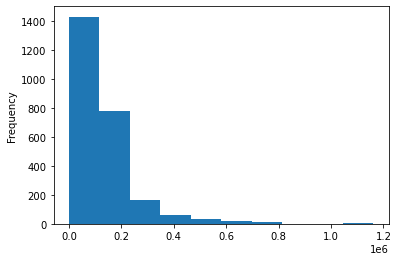

In [30]:
salarios_2022_bsas['w_mean'].plot(kind='hist')

Cambiando la cantidad de `bins` tenemos mayor granularidad:

<AxesSubplot:ylabel='Frequency'>

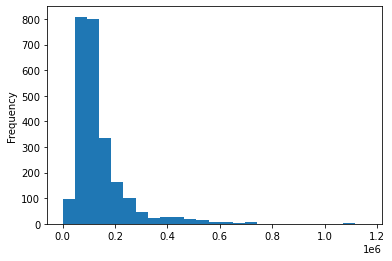

In [31]:
salarios_2022_bsas['w_mean'].plot(kind='hist', bins=25)

<AxesSubplot:ylabel='Frequency'>

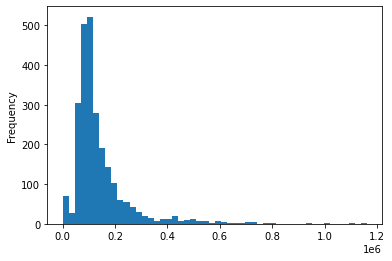

In [32]:
salarios_2022_bsas['w_mean'].plot(kind='hist', bins=50)

## Box plots

Siguiendo la línea de los salarios... ¿Cual es el rango donde se encuentrna la mayoría de los datos? ¿La mediana? Podemos tener un resumen estadístico con un [box plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#box-plots)

<AxesSubplot:>

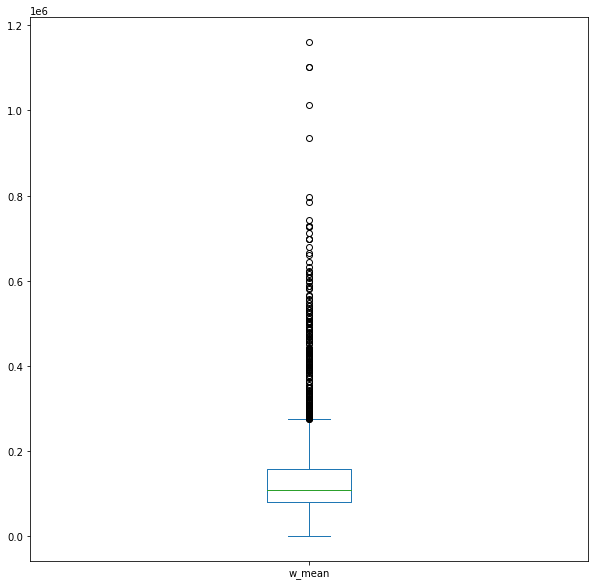

In [34]:
salarios_2022_bsas['w_mean'].plot(
    kind='box',
    figsize=(10, 10)
)

# Matplotlib

Dijimos que de fondo pandas usa [matplotlib](https://matplotlib.org) para hacer los plots. Es una librería que permite trabajar a bajo nivel, pero que también tiene un módulo de alto nivel llamado [pyplot](https://matplotlib.org/api/pyplot_api.html) que ofrece una interfaz similar a matlab, y es bastante cómoda. Muchas librerías de visualizaciones usan de fondo matplotlib.

Si revisamos los plots que hemos visto, nos gustaría poder cambiar algunas cosas:
- el tamaño
- la escala
- agregarle título
- descripción del eje y
- descripción del eje x
- etc

Revisaremos estos conceptos para trabajar más comodamente al momento de hacer plots

In [45]:
from matplotlib import pyplot as plt
import matplotlib

## Elementos de un plot
El siguiente código ha sido tomado de [la documentación de matplotlib](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html#anatomy-of-a-figure) para mostrar los diferentes elementos de un plot

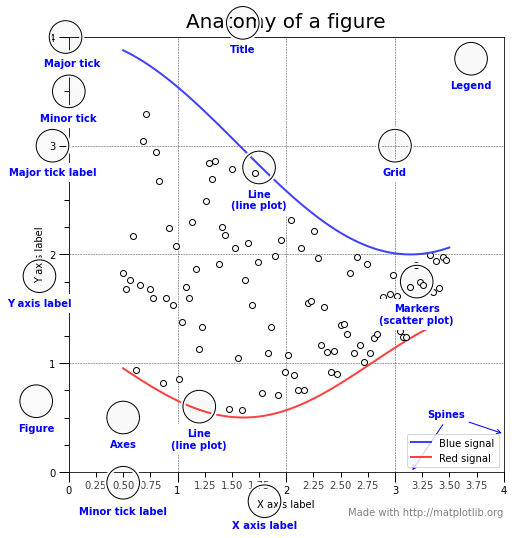

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x


ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0, marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke

    circle = Circle(
        (x, y),
        radius,
        clip_on=False,
        zorder=10,
        linewidth=1,
        edgecolor='black',
        facecolor=(0, 0, 0, 0.0125),
        path_effects=[withStroke(linewidth=5, foreground='w')],
    )
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(
        x,
        y,
        text,
        backgroundcolor="white",
        ha='center',
        va='top',
        weight='bold',
        color='blue',
    )


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate(
    'Spines',
    xy=(4.0, 0.35),
    xytext=(3.3, 0.5),
    weight='bold',
    color=color,
    arrowprops=dict(arrowstyle='->', connectionstyle="arc3", color=color),
)

ax.annotate(
    '',
    xy=(3.15, 0.0),
    xytext=(3.45, 0.45),
    weight='bold',
    color=color,
    arrowprops=dict(arrowstyle='->', connectionstyle="arc3", color=color),
)

ax.text(
    4.0, -0.4, "Made with http://matplotlib.org", fontsize=10, ha="right", color='.5'
)

plt.show()

### Figuras
En lo que nos es relevante ahora, una [figura](https://matplotlib.org/faq/usage_faq.html#figure) es un contenedor de plots. Las figuras tienen un identificador único. Podemos obtener la figura activa con `plt.gcf()` (`g`et `c`urrent `f`igure) o crear una nueva con `plt.figure()`.

Algunos parámetros que nos importan:
```
figsize(float, float), default: rcParams["figure.figsize"] (default: [6.4, 4.8])
Width, height in inches.

dpifloat, default: rcParams["figure.dpi"] (default: 100.0)
The resolution of the figure in dots-per-inch.
```

### Axis
Un [axis](https://matplotlib.org/faq/usage_faq.html#axes) es un plot per se, digamos.

### Axis labels
Son las descripciones en el eje x e y.

### Title
Es el título de la figura (no del plot).

### Legend
Son descripciones de colecciones de datos.

## Escalando los plots

Tenemos dos parámetros para ello. Hacen cosas distintas.

Por un lado `figsize` cambia el tamaño en pulgadas de la figura. `dpi` cambia la cantidad de pixels que hay en una pulgada.

Entonces dada una figura con figsize $(w,h)$ y dpi $d$: $$p_x = d*w\\p_y = d*h $$

Por defecto `dpi` vale `100` y `figsize` vale `[6.4, 4.8]`, de modo que obtendremos plots de `640 x 480`.

Podemos cambiar los valores por defecto de `matplotlib` a través del diciconario `rcParams`:

```python
matplotlib.rcParams['figure.dpi'] = 150
```

Veamos ahora algunos ejemplos.

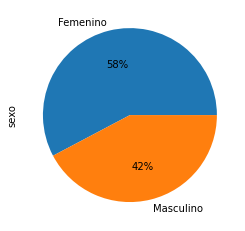

In [47]:
plt.figure()
personal_cyt['sexo'].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)
plt.show()

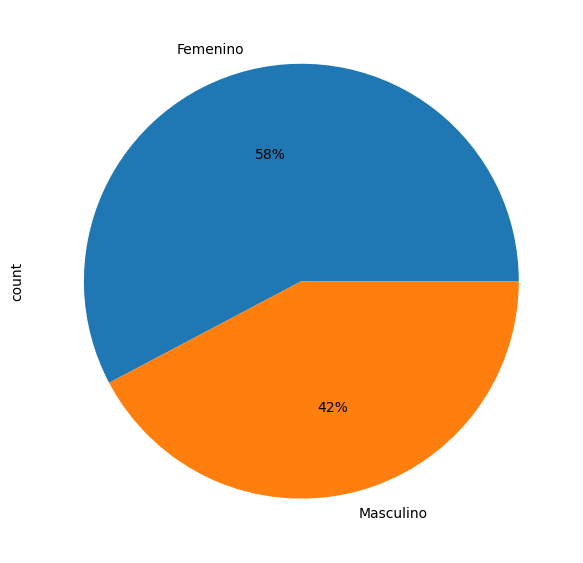

In [37]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5), dpi=100)
personal_cyt['sexo'].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)
plt.show()

Las fuentes estan en terminos relativos al dpi

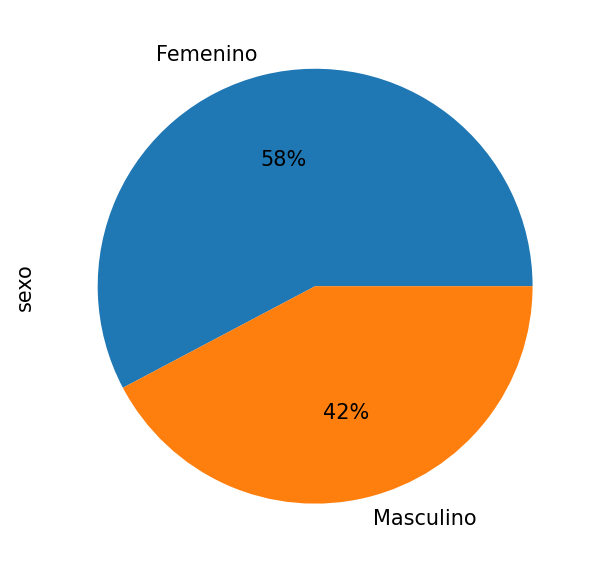

In [49]:
plt.figure(figsize=(6.4, 4.8), dpi=150)
personal_cyt['sexo'].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)
plt.show()

Recomendamos cambiar el tamaño con DPI si lo que se quiere es ver la visualizacion "mas grande", si lo que se quiere es cambiar la forma se puede usar el figsize

## Plots con pyplot

Vamos a repetir un poco los plots anteriores pero revisando la api de pyplot y cambiando algunas cosas.

### Bar plot

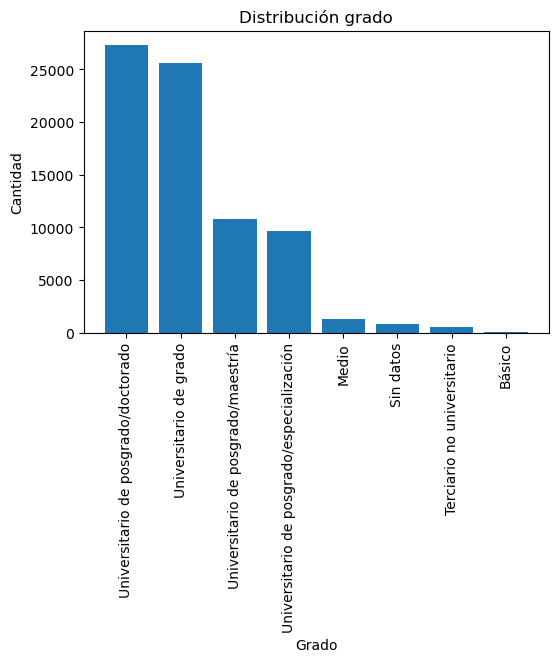

In [42]:
plt.figure(dpi=(100))
users_per_grade = (
   personal_cyt["grado"].value_counts().sort_values(
    ascending=False
)
)
plt.bar(users_per_grade.index, users_per_grade.values)
plt.ylabel("Cantidad")
plt.xlabel("Grado")
plt.title('Distribución grado')
plt.xticks(rotation=90)
plt.show()

Podemos cambiar al escala si así lo deseamos

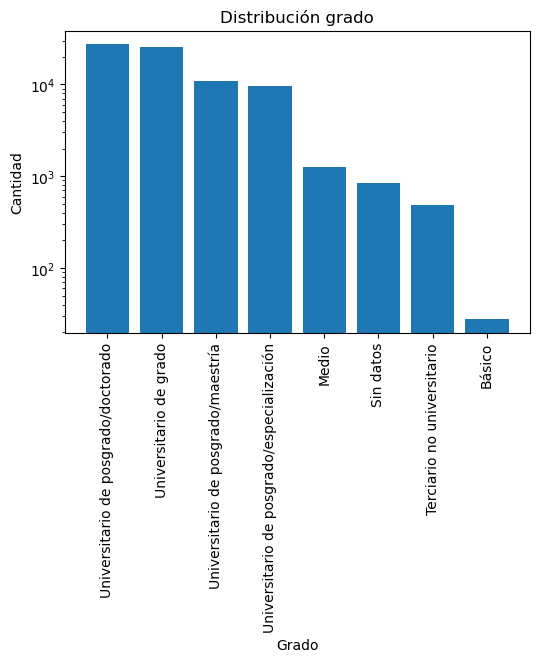

In [15]:
plt.figure(dpi=(100))
users_per_grade = (
   personal_cyt["grado"].value_counts().sort_values(
    ascending=False
)
)
plt.bar(users_per_grade.index, users_per_grade.values)
plt.yscale("log")
plt.ylabel("Cantidad")
plt.xlabel("Grado")
plt.title('Distribución grado')
plt.xticks(rotation=90)
plt.show()

### Scatter plot

Revisemos un scatter plot, pero con la api de pyplot.

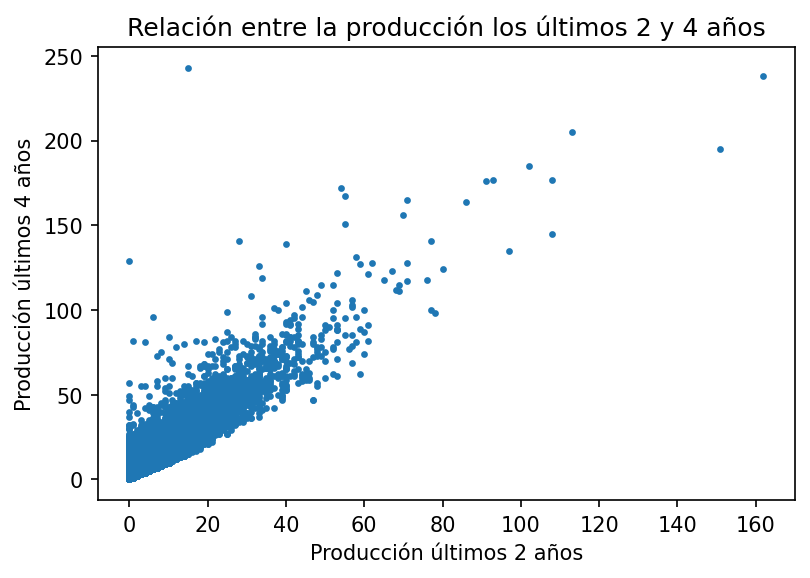

In [35]:
plt.figure(dpi=(150))

plt.scatter(
    x=personal_cyt['producciones_ult_2_anios'],
    y=personal_cyt['producciones_ult_4_anios'],
    s=5,
)
plt.ylabel("Producción últimos 4 años")
plt.xlabel("Producción últimos 2 años")
plt.title('Relación entre la producción los últimos 2 y 4 años')
plt.show()

Podriamos discriminar también por sexo

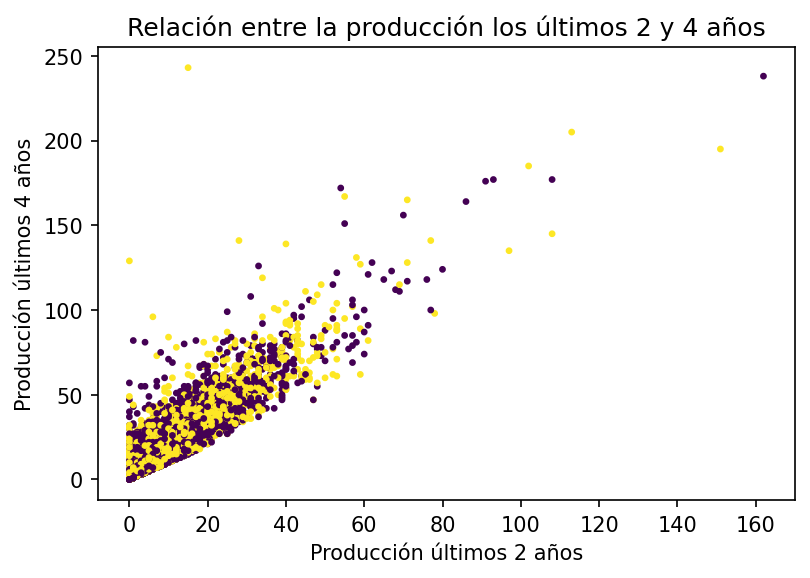

In [36]:

plt.figure(dpi=(150))

plt.scatter(
    x=personal_cyt['producciones_ult_2_anios'],
    y=personal_cyt['producciones_ult_4_anios'],
    s=5,c=personal_cyt['sexo_id'] #esto tiene que ser un numero o un color
)
plt.ylabel("Producción últimos 4 años")
plt.xlabel("Producción últimos 2 años")
plt.title('Relación entre la producción los últimos 2 y 4 años')
plt.show()

El problema es que ahora no sabemos cual es cada color..

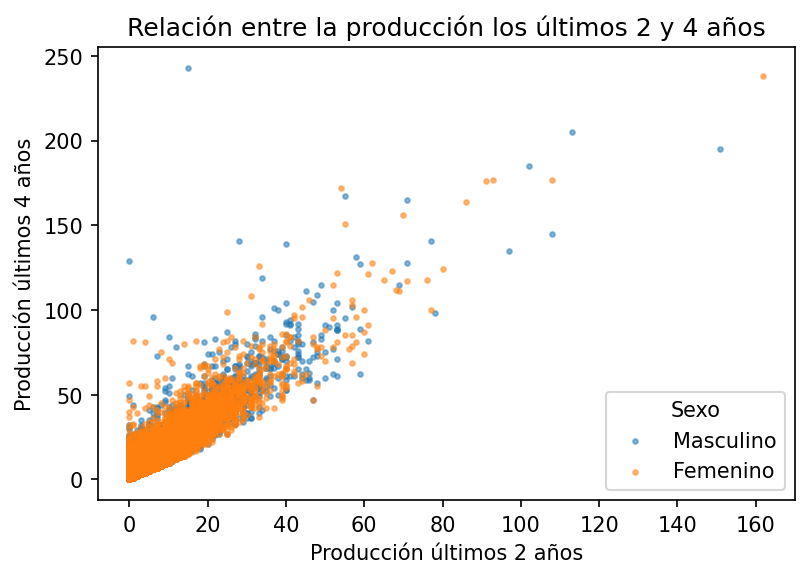

In [37]:
fig, ax = plt.subplots(dpi=150)

for sexo in personal_cyt['sexo'].unique():
    sexo_df = personal_cyt[personal_cyt['sexo'] == sexo]
    ax.scatter(
        x=sexo_df['producciones_ult_2_anios'],
        y=sexo_df['producciones_ult_4_anios'],
        s=5,
        label=sexo,
        alpha=0.5, #le ponemos transparencia para que se vean mejor cuando hay mucha superposicion
    )

ax.legend(title="Sexo")
plt.ylabel("Producción últimos 4 años")
plt.xlabel("Producción últimos 2 años")
plt.title('Relación entre la producción los últimos 2 y 4 años')
plt.show()

Pero hay outliers que nos complican... veamos los que están hasta 60 los ultimos 2 años y 100 en los 4

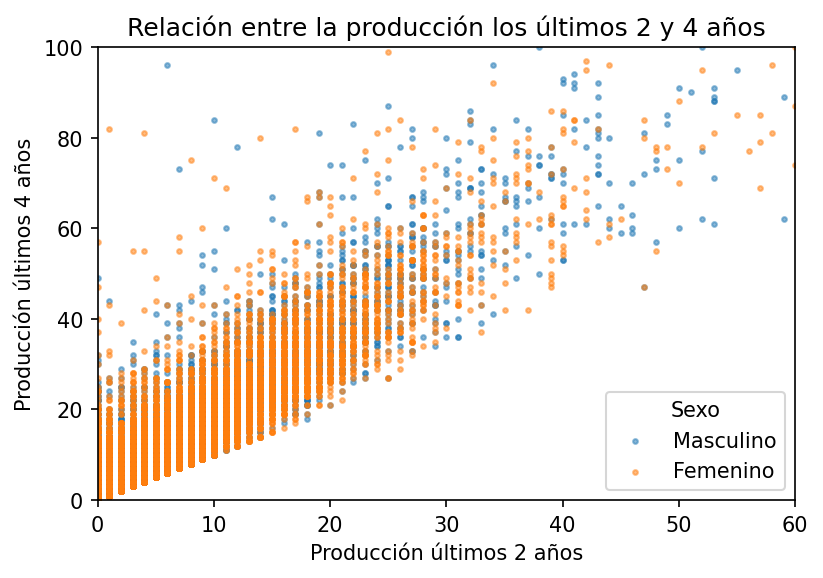

In [38]:
fig, ax = plt.subplots(dpi=150)

for sexo in personal_cyt['sexo'].unique():
    sexo_df = personal_cyt[personal_cyt['sexo'] == sexo]
    ax.scatter(
        x=sexo_df['producciones_ult_2_anios'],
        y=sexo_df['producciones_ult_4_anios'],
        s=5,
        label=sexo,
        alpha=0.5, #le ponemos transparencia para que se vean mejor cuando hay mucha superposicion
    )

ax.legend(title="Sexo")
plt.xlim(0,60)
plt.ylim(0,100)
plt.ylabel("Producción últimos 4 años")
plt.xlabel("Producción últimos 2 años")
plt.title('Relación entre la producción los últimos 2 y 4 años')
plt.show()

Como el sexo femenino fue el último en ser ploteada ofusca el plot, además los colores no parecen adecuados, ya solucionaremos esto

### Histograma

Quizás notaron ese llamado a `plt.subplots`. Vamos a ver un poco de qué se trata mientras vemos como hacer histogramas.

Tanto el salario 2022 como el 2023 tienen soportes continuos, y demasiados valores diferentes. ¿Estaría bueno ver un histograma de cada uno no? Sería incluso mejor tenerlos lado a lado.

In [43]:
salarios_2021_bsas = salarios[(salarios['fecha']=='2021-03-01') & (salarios['provincia'] == 'Buenos Aires')]

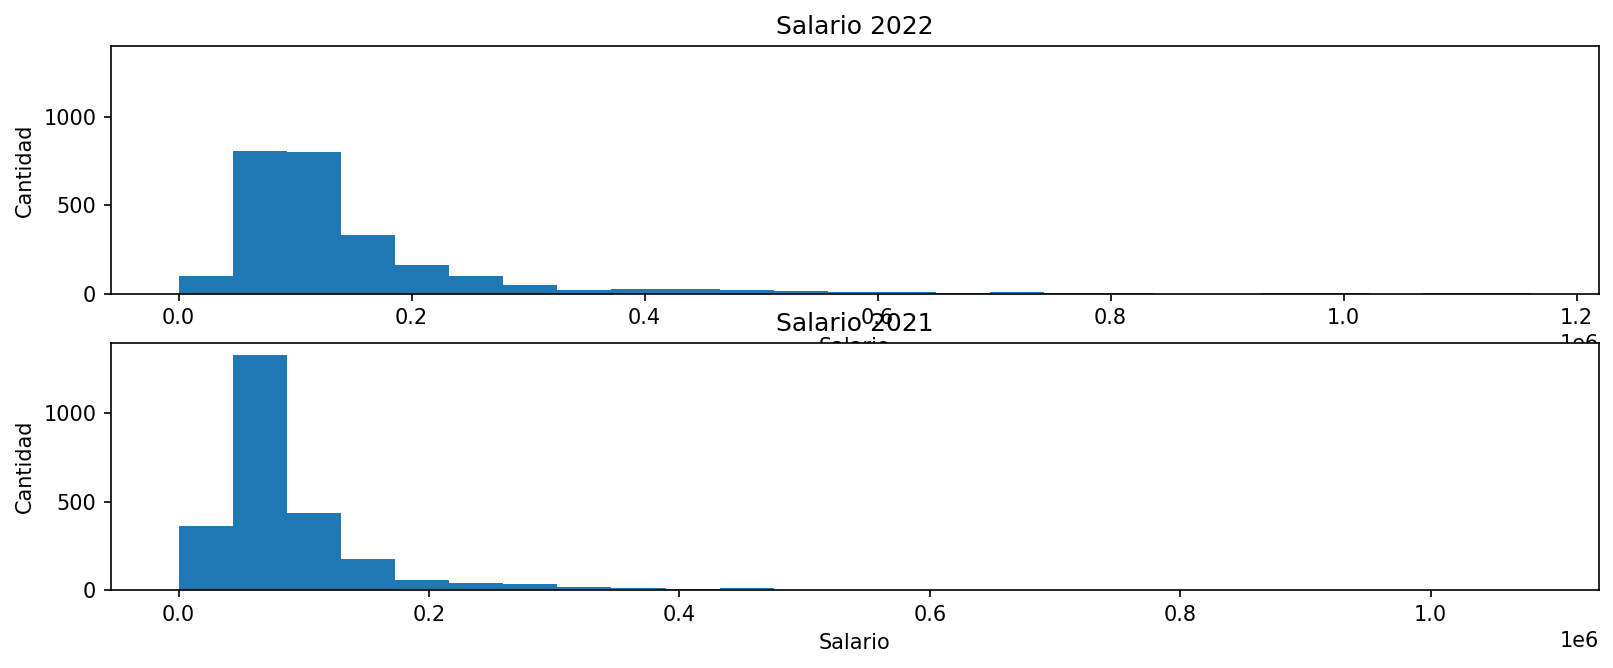

In [45]:


fig, axes = plt.subplots(nrows=2, ncols=1, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))

axes[0].hist(salarios_2022_bsas['w_mean'], bins=25)
axes[0].set_title("Salario 2022")
axes[0].set_xlabel("Salario")
axes[0].set_ylabel("Cantidad")

axes[1].hist(salarios_2021_bsas['w_mean'], bins=25)
axes[1].set_title("Salario 2021")
axes[1].set_xlabel("Salario")
axes[1].set_ylabel("Cantidad")

plt.show()

Sabiendo que podemos superponerlos, podriamos superponer los histogramas

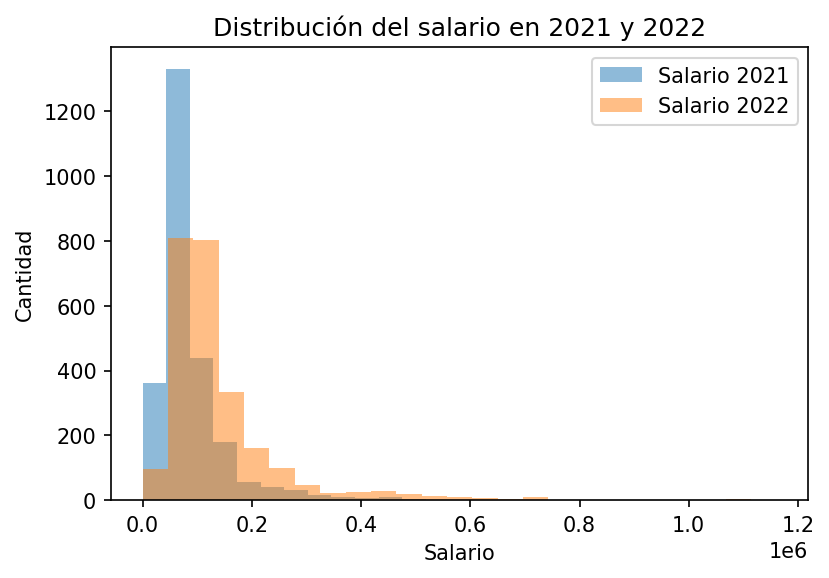

In [48]:

plt.figure(dpi=150)

plt.hist(
    salarios_2021_bsas['w_mean'],
    bins=25,
    label="Salario 2021",
    alpha=0.5,
)

plt.hist(
    salarios_2022_bsas['w_mean'],
    bins=25,
    label="Salario 2022",
    alpha=0.5,
)
plt.title("Distribución del salario en 2021 y 2022")
plt.xlabel("Salario")
plt.ylabel("Cantidad")
plt.legend()

plt.show()

Para comparar distribuciones continuas podriamos usar tambien boxplots y violinplots.

Veamos como señalar cosas que creamos importantes.

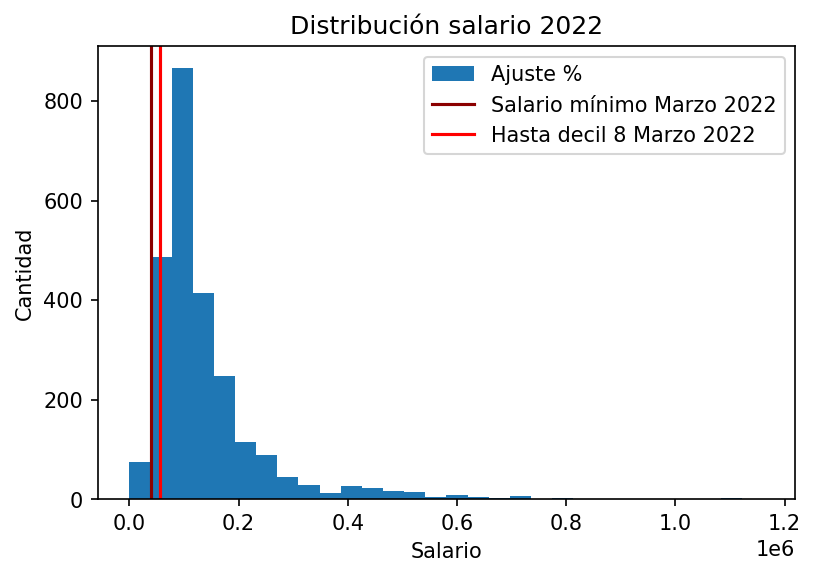

In [49]:
plt.figure(dpi=150)

plt.hist(salarios_2022_bsas['w_mean'], bins=30, label="Ajuste %")

plt.title("Distribución salario 2022")
plt.ylabel("Cantidad")
plt.xlabel("Salario")
plt.axvline(x=38900, color="darkred", label="Salario mínimo Marzo 2022")
plt.axvline(x=55500, color="red", label="Hasta decil 8 Marzo 2022")
plt.legend()
plt.show()

# Seaborn

In [52]:
import seaborn as sns

In [53]:
sns.set()

[Seaborn](http://seaborn.pydata.org) tambien usa matplotlib al igual que pandas, por lo que todas las funciones de matplotlib tambien le sirven. 

Y ADEMSA ES MUCHO MAS LINDO 💗

## Distribution plots

### Countplot

El countplot es la forma que tiene seaborn de hacer gráficos de barras, permitiendo dividirlo de distintas formas.

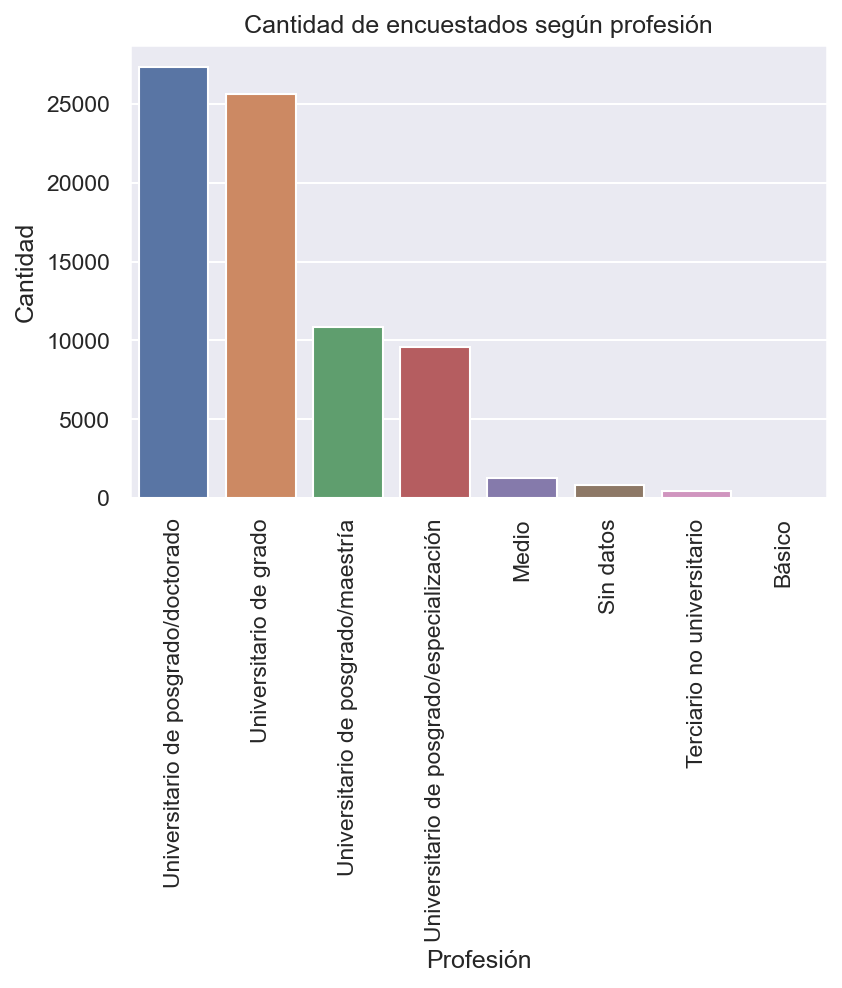

In [56]:
plt.figure(dpi=150)
sns.countplot(x="grado", data=personal_cyt,order=personal_cyt["grado"].value_counts().index)
plt.ylabel("Cantidad")
plt.xlabel("Profesión")
plt.title("Cantidad de encuestados según profesión")
plt.xticks(rotation=90)
plt.show()

## Discriminando por sexo

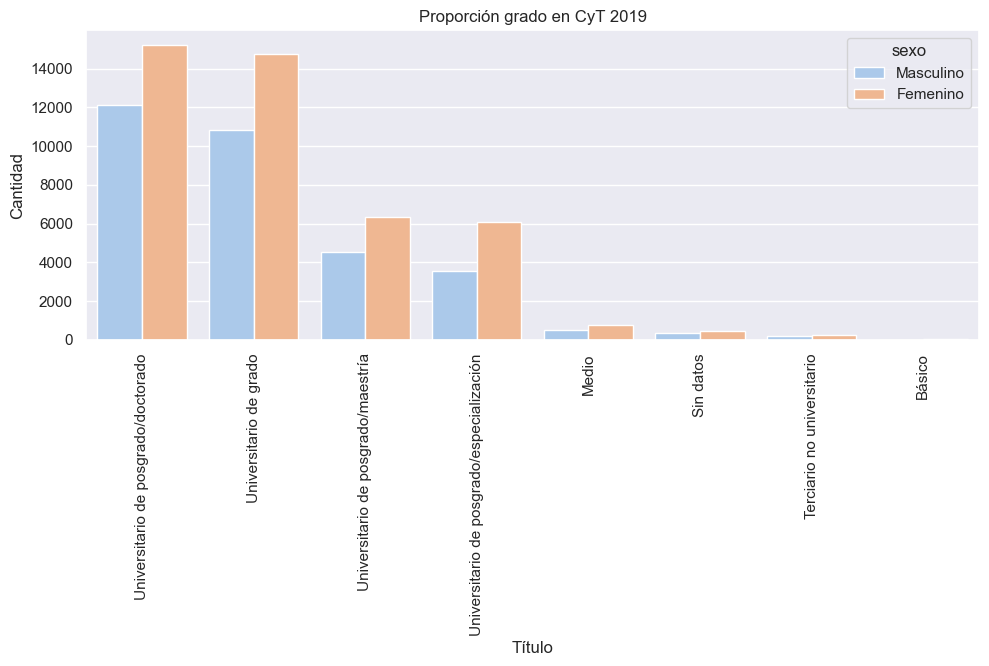

In [36]:
sns.set_palette('pastel')
plt.figure(figsize=(6.4 * 1.8, 4.8 * 1.5), dpi=100)
sns.countplot(
    x="grado", data=personal_cyt, order=personal_cyt["grado"].value_counts().index,
    hue='sexo'
)
plt.ylabel("Cantidad")
plt.xlabel("Título")
plt.title("Proporción grado en CyT 2019")
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.45)
plt.savefig('bar chart grado sexo.png')
plt.show()

### Density plot

Podemos ver la distribución del salario como habíamos visto con el histograma

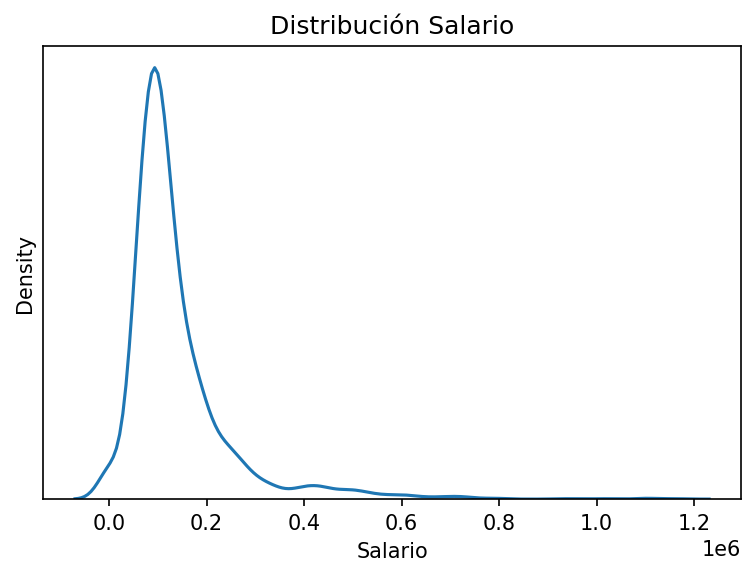

In [6]:
plt.figure(dpi=150)

sns.kdeplot(
   salarios_2022_bsas['w_mean'], label="Salario Bs As 2022"
)
plt.title("Distribución Salario")
plt.xlabel("Salario")
plt.yticks([], [])

plt.show()

### Violinplot

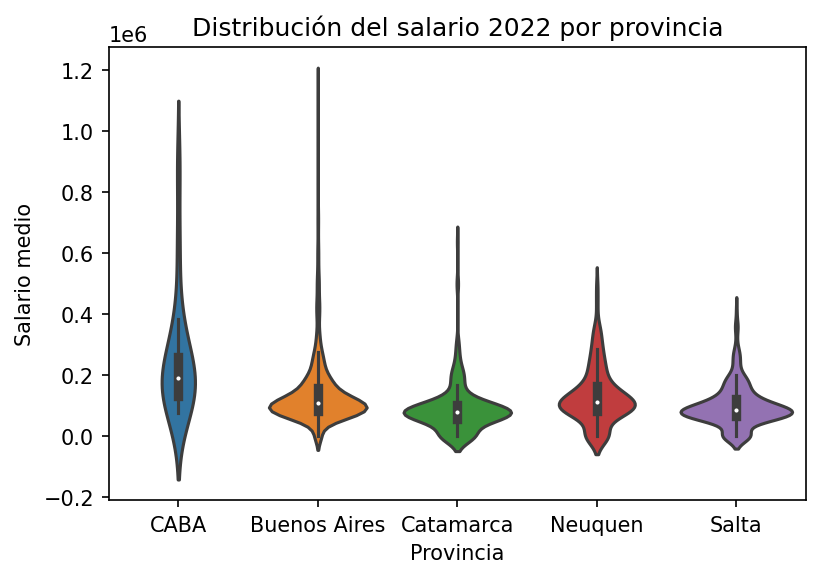

In [51]:
filtered = salarios[salarios['fecha']=='2022-03-01']
filtered = filtered[(filtered['provincia'] == 'CABA') |(filtered['provincia'] == 'Neuquen') | (filtered['provincia'] == 'Catamarca')| (filtered['provincia'] == 'Buenos Aires')| (filtered['provincia'] == 'Salta')]

plt.figure( dpi=150)
sns.violinplot(x="provincia", y="w_mean", data=filtered)
plt.ylabel("Salario medio")
plt.xlabel("Provincia")
plt.title("Distribución del salario 2022 por provincia")

#plt.savefig('violin salarios provincias.png')
plt.show() 

## Beanplot

C:\Users\PC-Usuario\AppData\Local\Temp\ipykernel_4248\1956444209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_2['Enseñanza'] = filtered_2['letra']=='P'


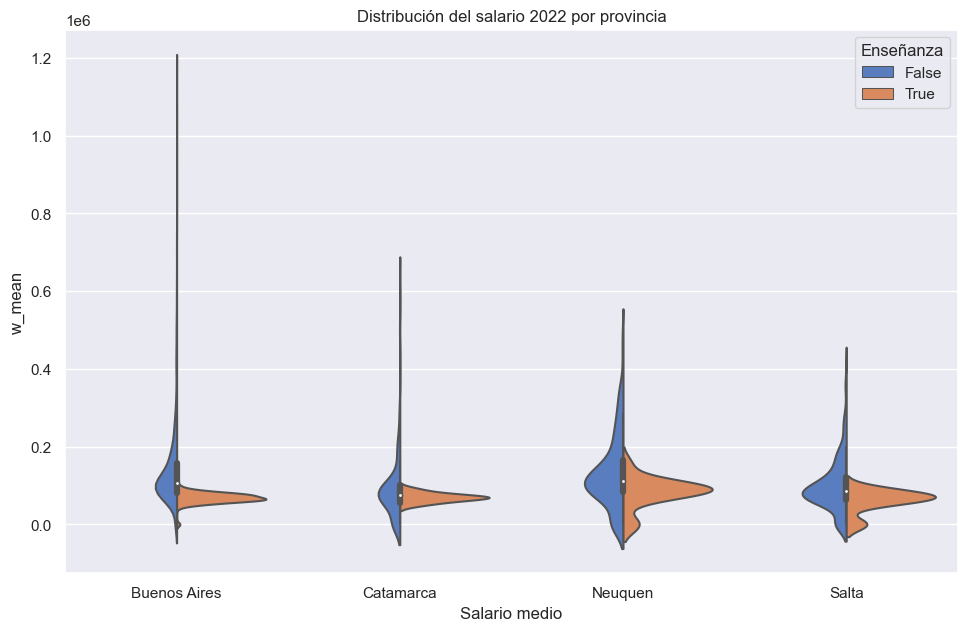

In [20]:
filtered_2 = filtered[filtered['provincia']!='CABA' ]
filtered_2['Enseñanza'] = filtered_2['letra']=='P' #Creo campo eneseñanza en base a si el rubro es ese o no
plt.figure(figsize=(6.4 * 1.8, 4.8 * 1.5), dpi=100)
ax = sns.violinplot(x="provincia", y="w_mean", hue="Enseñanza",
                    data=filtered_2, palette="muted", split=True)
plt.xlabel("Salario medio")
plt.title("Distribución del salario 2022 por provincia")

plt.savefig('boxplot salarios provincias ensenianza.png')
plt.show() 

### Boxplot

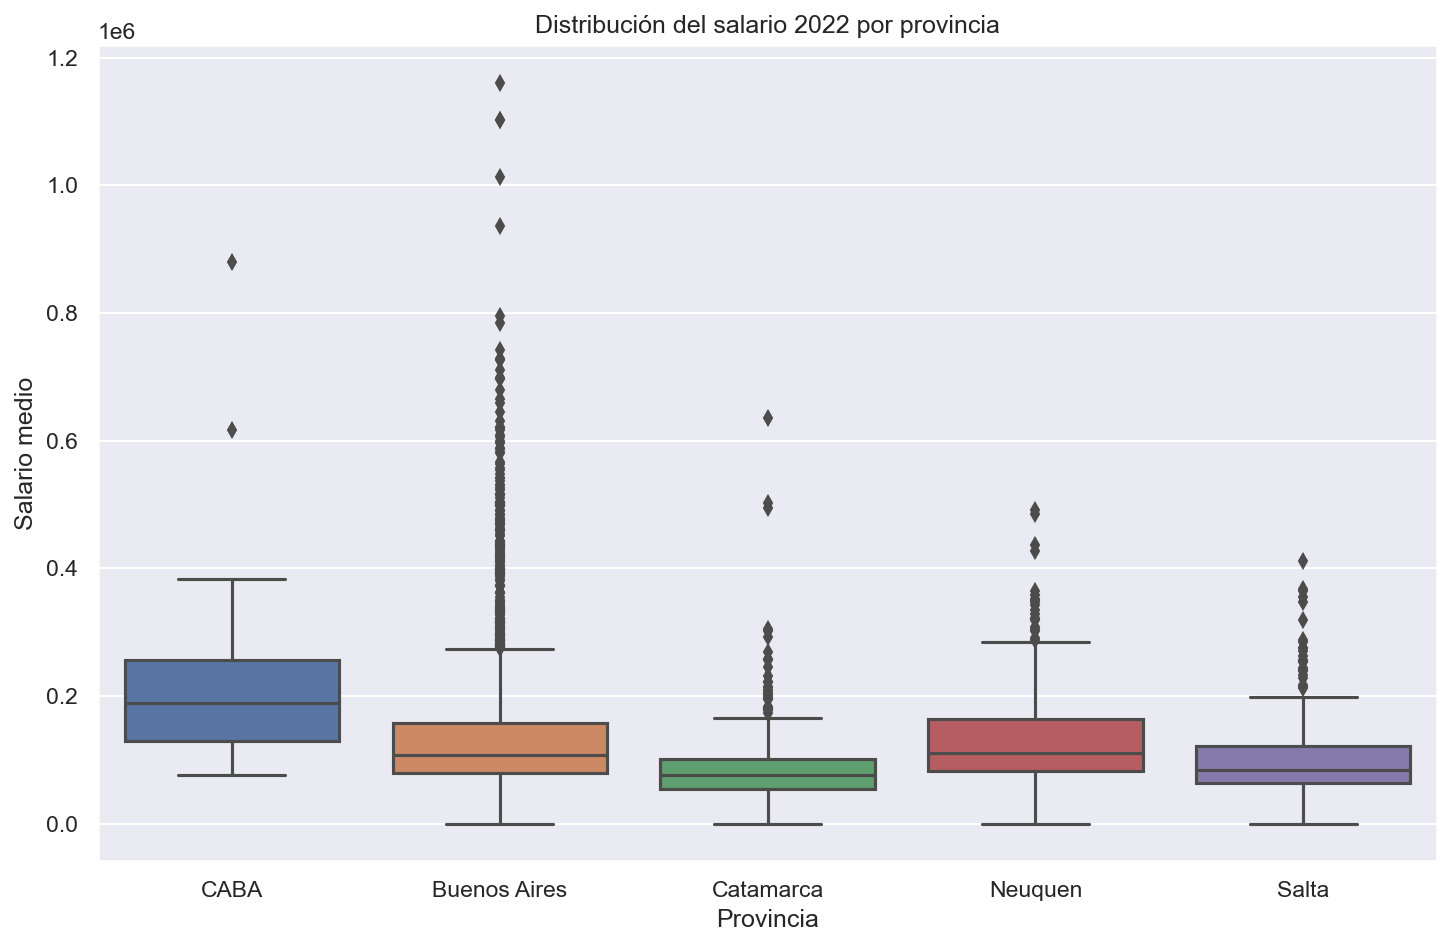

In [11]:
plt.figure(figsize=(6.4 * 1.8, 4.8 * 1.5), dpi=150)
sns.boxplot(x="provincia", y="w_mean", data=filtered)
plt.ylabel("Salario medio")
plt.xlabel("Provincia")
plt.title("Distribución del salario 2022 por provincia")

plt.savefig('boxplot salarios provincias.png')
plt.show() 


### Scatter plot

Recordemos el último scatter que hicimos

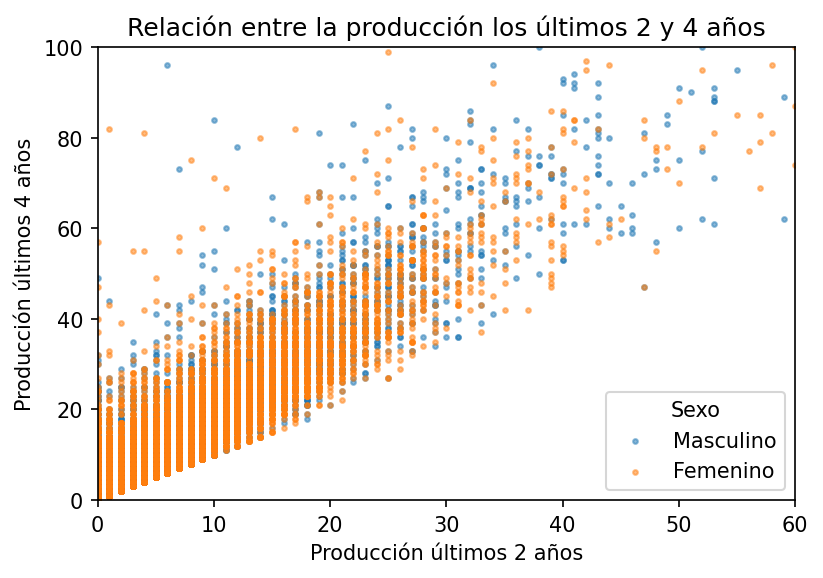

In [38]:
fig, ax = plt.subplots(dpi=150)

for sexo in personal_cyt['sexo'].unique():
    sexo_df = personal_cyt[personal_cyt['sexo'] == sexo]
    ax.scatter(
        x=sexo_df['producciones_ult_2_anios'],
        y=sexo_df['producciones_ult_4_anios'],
        s=5,
        label=sexo,
        alpha=0.5, #le ponemos transparencia para que se vean mejor cuando hay mucha superposicion
    )

ax.legend(title="Sexo")
plt.xlim(0,60)
plt.ylim(0,100)
plt.ylabel("Producción últimos 4 años")
plt.xlabel("Producción últimos 2 años")
plt.title('Relación entre la producción los últimos 2 y 4 años')
plt.show()

Al haber ploteado en orden los distintos puntos se superponen de forma que no nos permite ver diferencias. Con el hue de seaborn podemos hacer que la superposición sea random.

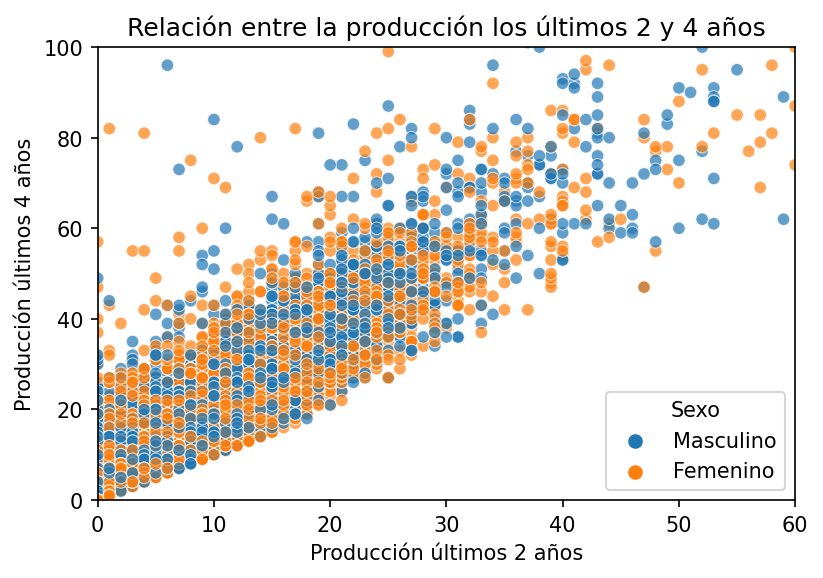

In [55]:


plt.figure(dpi=150)
sns.scatterplot(
    x='producciones_ult_2_anios',
    y='producciones_ult_4_anios',
    hue='sexo',
    data=personal_cyt,
    alpha=0.7,
)
plt.xlim(0,60)
plt.ylim(0,100)
plt.legend(title="Sexo")
plt.ylabel("Producción últimos 4 años")
plt.xlabel("Producción últimos 2 años")
plt.title('Relación entre la producción los últimos 2 y 4 años')
plt.show()

Ahora se puede apreciar mejor el gradiente de colores a medida el salario aumenta

## Heatmap

Vamos a ver la relación entre rubros, provincias y sueldos.

Primero achico los nombres de los rubros para hacer mas legible el gráfico

In [57]:
rubro_short = {' AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y PESCA':'Agricultura',
       'EXPLOTACION DE MINAS Y CANTERAS':'Minería', ' INDUSTRIA MANUFACTURERA':'Manufactura',
       ' SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO':'Suministro energía',
       ' SUMINISTRO DE AGUA; CLOACAS; GESTIÓN DE RESIDUOS Y RECUPERACIÓN DE MATERIALES Y SANEAMIENTO PUBLICO':'ABL',
       ' CONSTRUCCIÓN':'CONSTRUCCIÓN',
       ' COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS':'Reparación',
       ' SERVICIO DE TRANSPORTE Y ALMACENAMIENTO ':'Transporte',
       ' SERVICIOS DE ALOJAMIENTO Y SERVICIOS DE COMIDA':'Hotelería',
       ' INFORMACIÓN Y COMUNICACIONES':'Informática',
       ' INTERMEDIACIÓN FINANCIERA Y SERVICIOS DE SEGUROS ':'Financiero',
       ' SERVICIOS INMOBILIARIOS':'Inmobiliario',
       ' SERVICIOS PROFESIONALES, CIENTÍFICOS Y TÉCNICOS':'Ciencia',
       ' ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS DE APOYO':'Administrativo', ' ENSEÑANZA':'Enseñanza',
       ' SALUD HUMANA Y SERVICIOS SOCIALES':'Salud',
       ' SERVICIOS  ARTÍSTICOS, CULTURALES, DEPORTIVOS  Y DE ESPARCIMIENTO':'Cultura',
       ' SERVICIOS DE ASOCIACIONES Y SERVICIOS PERSONALES ':'Servicios pers',
       'Desconocido':'Desconocido'}
salarios['rubro_short'] = salarios['rubro'].apply(lambda x: rubro_short[x])

Primero tenemos que crear una [Tabla Dinámica](https://es.wikipedia.org/wiki/Tabla_din%C3%A1mica) o Pivo table. Basicamente es una tabla-resumen que agrupa datos procedentes de otra tabla o base de datos de mayor tamaño.

In [58]:

cooccurrence = pd.pivot_table(
    salarios,
    values='w_mean',
    index='provincia',
    columns='rubro_short',
).sort_index()

cooccurrence.head()

rubro_short,ABL,Administrativo,Agricultura,CONSTRUCCIÓN,Ciencia,Cultura,Desconocido,Enseñanza,Financiero,Hotelería,Informática,Inmobiliario,Manufactura,Minería,Reparación,Salud,Servicios pers,Suministro energía,Transporte
provincia,,,,,,,,,,,,,,,,,,,
Buenos Aires,71475.479312,41421.289988,54696.042490,50789.422835,53490.494536,39596.287222,44793.385423,33905.531216,99044.637385,30026.792885,100717.441146,44781.474030,75209.485698,157911.685592,55731.993596,54190.613354,54322.552939,137977.435702,73519.773795
CABA,117619.003269,75062.885441,99879.957845,66159.140622,107159.930895,60725.825405,105912.822792,44617.070623,165402.079683,36616.590958,138929.727491,64830.569129,111961.108017,433593.349377,81589.100186,79372.292525,68416.453277,203976.112364,91407.445036
Catamarca,33146.665380,36019.824875,34309.642889,40360.533466,29967.996771,9936.445620,18847.959265,33681.687538,46732.303903,24949.397344,54273.698786,20742.591599,47454.754701,85080.004128,39658.074410,39177.071917,29875.578883,105242.830977,55435.869119
Chaco,33934.890986,33423.367275,37767.537558,38685.191353,32394.341607,35019.405185,30133.541053,28737.532589,176176.937362,26490.349618,51621.781534,31787.073504,49745.537166,65457.920604,45718.330171,45403.497553,35922.096676,59802.211100,50656.498035
Chubut,43401.305262,45616.467016,62353.538925,74470.488996,45980.530002,42668.109208,36372.920059,37001.011020,69945.911783,35417.844595,63957.319781,35045.996765,64372.191836,155216.118177,56071.696508,46799.619321,50676.240437,183132.927893,74068.209994


In [59]:
cooccurrence.shape

(25, 19)

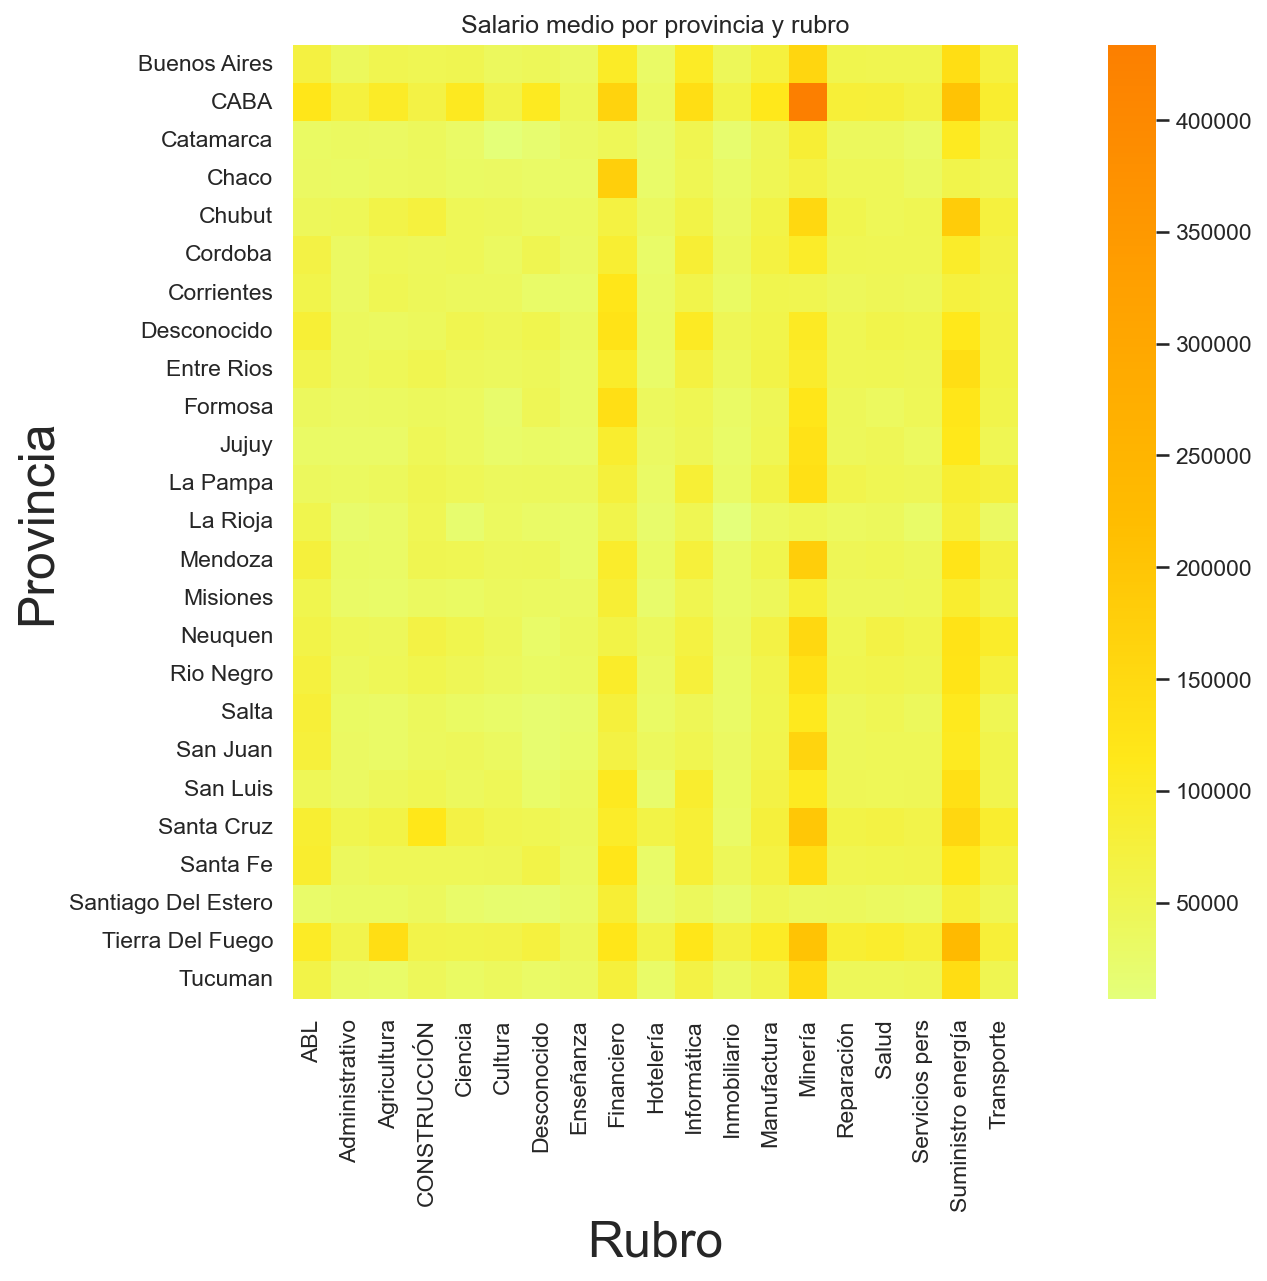

In [27]:
plt.figure(figsize=(6.4 * 2.5, 4.8 * 2.5), dpi=150)

sns.heatmap(cooccurrence, square=True, cmap="Wistia", xticklabels=True, yticklabels=True)
plt.title("Salario medio por provincia y rubro")
plt.ylabel("Provincia", fontsize=24)
plt.xlabel("Rubro", fontsize=24)
plt.subplots_adjust(bottom=0.35)
plt.subplots_adjust(left=0.15)
#plt.savefig('heatmap salario.png') #AH ME OLVIDABA, CON ESTA INSTRUCCIÓN PUEDEN GUARDAR EL GRAFICO EN UN JPG
plt.show()

## Correlaciones entre todos los campos

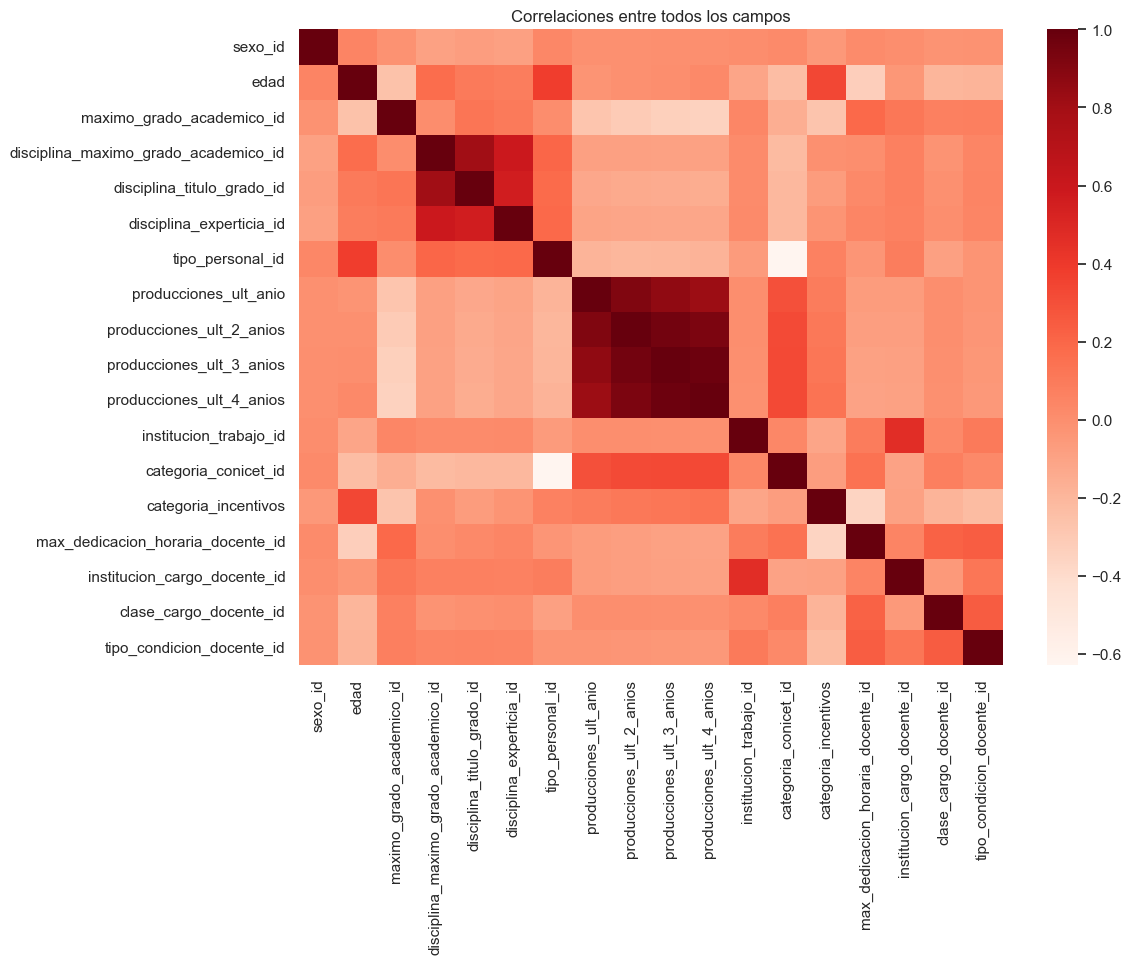

In [32]:
plt.figure(figsize=(6.4 * 2.5, 4.8 * 2.5), dpi=100)
cor = personal_cyt[[ 'sexo_id', 'edad', 'maximo_grado_academico_id',
       'disciplina_maximo_grado_academico_id', 'disciplina_titulo_grado_id',
       'disciplina_experticia_id', 'tipo_personal_id', 'producciones_ult_anio',
       'producciones_ult_2_anios', 'producciones_ult_3_anios',
       'producciones_ult_4_anios', 'institucion_trabajo_id', 'seniority_level',
       'categoria_conicet_id', 'categoria_incentivos',
       'max_dedicacion_horaria_docente_id', 'institucion_cargo_docente_id',
       'clase_cargo_docente_id', 'tipo_condicion_docente_id']].corr()
sns.heatmap(cor,  cmap="Reds")
plt.title("Correlaciones entre todos los campos")
plt.subplots_adjust(bottom=0.35)
plt.subplots_adjust(left=0.35)
plt.savefig('heatmap corr.png')
plt.show()

## Line Plots

### Comparando evolución de salarios

Vamos a comprar la evolución del salario entre Enseñanza y Mintería durante 2021 en Catamarca. 

Primero filtramos del dataframe original solamente estos rubros, año y provincia (y departamento)

In [60]:
import datetime
def get_month(date):
    datee = datetime.datetime.strptime(date, "%Y-%m-%d")
    return(datee.month)
def get_year(date):
    datee = datetime.datetime.strptime(date, "%Y-%m-%d")
    return(datee.year)
salarios['mes'] = salarios['fecha'].apply(lambda x: get_month(x))
salarios['anio'] = salarios['fecha'].apply(lambda x: get_year(x)) #Esto es para extraer solamente el año y guardarlo en un campo aparte

ensenianzaYmineria = salarios[(salarios['anio']==2021) &((salarios['letra']=='P') | (salarios['letra']=='B')) & (salarios['provincia'] == 'Catamarca')  & (salarios['codigo_departamento_indec'] == 10028) ]

In [64]:
ensenianzaYmineria.dropna(inplace=True)

/tmp/ipykernel_69361/66304201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ensenianzaYmineria.dropna(inplace=True)


Ahora graficamos usando nuevamente el campo "hue"

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

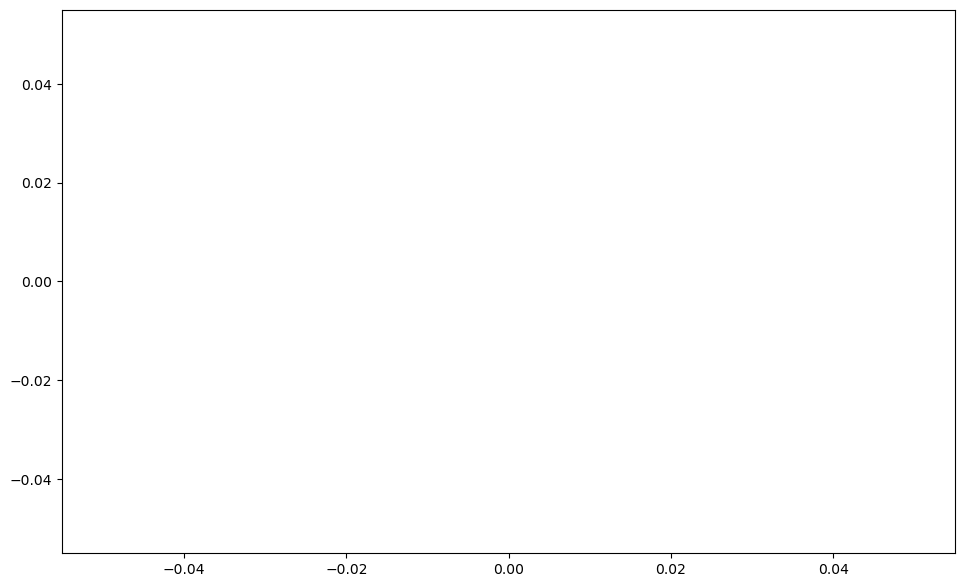

In [65]:

sns.set_palette('pastel')
plt.figure(figsize=(6.4 * 1.8, 4.8 * 1.5), dpi=100)

sns.lineplot(data=ensenianzaYmineria, x="mes", y="w_mean", hue="rubro")
plt.ylabel("Cantidad")
plt.xlabel("Sexo")
plt.title("Proporción grado y género en CyT 2019")
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.45)
plt.savefig('line chart salario antofagasta enseñanza.png')
plt.show()

#### Line plot estacionales

Usando el campo <i>hue</i> también podemos crear series estacionales!

Para esto vamos a usar info de la evolución de los salarios en CABA.

In [48]:
ensenianza = salarios[(salarios['letra']=='P') & (salarios['provincia'] == 'CABA')  ]

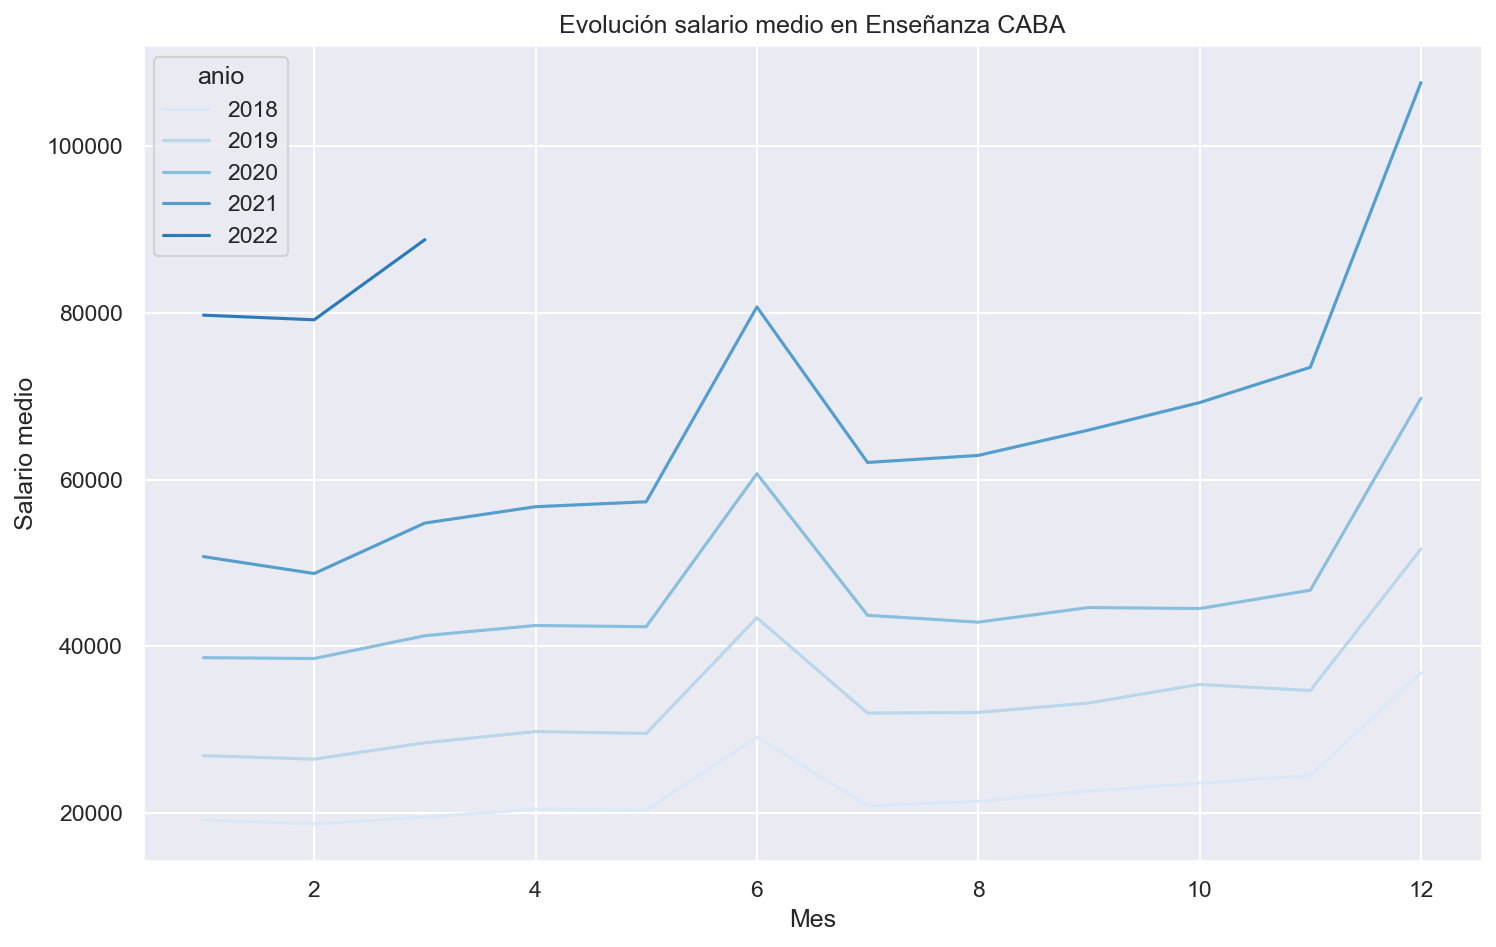

In [52]:
plt.figure( figsize=(6.4 * 1.8, 4.8 * 1.5),dpi=150)

sns.lineplot(data=ensenianza, 
             x='mes', 
             y='w_mean', 
             hue='anio', 
             legend='full', palette=sns.color_palette('Blues')[0:5])
plt.ylabel("Salario medio")
plt.xlabel("Mes")
plt.title("Evolución salario medio en Enseñanza CABA")

plt.show()

## Referencias

- [Documentación de seaborn](http://seaborn.pydata.org/tutorial/color_palettes.html)
- [Diverging Color Maps for Scientific Visualization - Kenneth Moreland](https://cfwebprod.sandia.gov/cfdocs/CompResearch/docs/ColorMapsExpanded.pdf)
- [XKCD color survey](https://blog.xkcd.com/2010/05/03/color-survey-results/)
- [Subtleties of colors series](https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/)
- [Documentación de matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html)

# Pandas profiling

## De bonus track les dejo otra librería :Pandas Profiling, con 2 líneas de código te genera todo un reporte del dataframe 🤯

In [ ]:
#!pip install pandas_profiling
!pip install ydata_profiling

In [3]:
from ydata_profiling import ProfileReport

report = ProfileReport(
    salarios, title='Salarios', explorative=True, lazy=False
)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/juanma/anaconda3/lib/python3.9/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'A'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
report.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]